In [24]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, RobustScaler
from sklearn.model_selection import StratifiedShuffleSplit

In [3]:
# Load data
data = pd.read_excel('../data/data.xlsx')
data

,sequence,Episode 1,ID Episode 1,Runtime Episode 1,Time period Episode 1,Genres Episode 1,Rating Episode 1,Episode 2,ID Episode 2,Runtime Episode 2,...,Episode 8,ID Episode 8,Runtime Episode 8,Time period Episode 8,Genres Episode 8,Rating Episode 8,drama label,thriller label,action label,max_label
0,1806,Pink,4069937,56m,6 Months After the Heist,"{'drama': 0.41, 'thriller': 0.32, 'action': 0.27}",7.5,Red,4069936,36m,...,White,4069938,48m,The Heist,"{'drama': 0.0, 'thriller': 0.48, 'action': 0.52}",7.4,0.2078,0.5033,0.2889,thriller
1,9254,Yellow,3483983,49m,6 Weeks Before the Heist,"{'drama': 0.13, 'thriller': 0.39, 'action': 0.48}",7.0,Pink,4069937,56m,...,White,4069938,48m,The Heist,"{'drama': 0.0, 'thriller': 0.48, 'action': 0.52}",7.4,0.1773,0.4173,0.4055,thriller
2,31441,Orange,4069935,52m,3 Weeks Before the Heist,"{'drama': 0.71, 'thriller': 0.14, 'action': 0.14}",7.1,Yellow,3483983,49m,...,Blue,4069266,48m,5 Days Before the Heist,"{'drama': 0.38, 'thriller': 0.43, 'action': 0.19}",7.2,0.2683,0.3617,0.3700,action
3,18465,Blue,4069266,48m,5 Days Before the Heist,"{'drama': 0.56, 'thriller': 0.33, 'action': 0.11}",7.2,Red,4069936,36m,...,Orange,4069935,52m,3 Weeks Before the Heist,"{'drama': 0.6, 'thriller': 0.25, 'action': 0.15}",7.1,0.3157,0.4386,0.2458,thriller
4,34383,Violet,4069934,49m,24 Years Before the Heist,"{'drama': 0.71, 'thriller': 0.1, 'action': 0.19}",7.5,Red,4069936,36m,...,Orange,4069935,52m,3 Weeks Before the Heist,"{'drama': 0.6, 'thriller': 0.25, 'action': 0.15}",7.1,0.3888,0.2875,0.3238,drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30315,27756,Yellow,3483983,49m,6 Weeks Before the Heist,"{'drama': 0.13, 'thriller': 0.39, 'action': 0.48}",7.0,Blue,4069266,48m,...,Orange,4069935,52m,3 Weeks Before the Heist,"{'drama': 0.6, 'thriller': 0.25, 'action': 0.15}",7.1,0.2596,0.3677,0.3727,action
30316,30759,Orange,4069935,52m,3 Weeks Before the Heist,"{'drama': 0.71, 'thriller': 0.14, 'action': 0.14}",7.1,Green,3485676,46m,...,Yellow,3483983,49m,6 Weeks Before the Heist,"{'drama': 0.13, 'thriller': 0.39, 'action': 0.48}",7.0,0.3113,0.4394,0.2492,thriller
30317,823,Orange,4069935,52m,3 Weeks Before the Heist,"{'drama': 0.71, 'thriller': 0.14, 'action': 0.14}",7.1,Green,3485676,46m,...,Violet,4069934,49m,24 Years Before the Heist,"{'drama': 0.52, 'thriller': 0.24, 'action': 0.24}",7.5,0.3113,0.4474,0.2412,thriller
30318,36432,Orange,4069935,52m,3 Weeks Before the Heist,"{'drama': 0.71, 'thriller': 0.14, 'action': 0.14}",7.1,Green,3485676,46m,...,Pink,4069937,56m,6 Months After the Heist,"{'drama': 0.55, 'thriller': 0.2, 'action': 0.25}",7.5,0.4168,0.2891,0.2941,drama


In [4]:
# Drop unnesessary columns
rating_columns = [col for col in data.columns if col.startswith("Rating")]
runtime_columns = [col for col in data.columns if col.startswith("Runtime")]
id_columns = [col for col in data.columns if col.startswith("ID")]
sequence_column = ['sequence']

cols_to_drop = rating_columns + id_columns + sequence_column + runtime_columns

data = data.drop(columns=cols_to_drop, axis=1)
data.head()

,Episode 1,Time period Episode 1,Genres Episode 1,Episode 2,Time period Episode 2,Genres Episode 2,Episode 3,Time period Episode 3,Genres Episode 3,Episode 4,...,Episode 7,Time period Episode 7,Genres Episode 7,Episode 8,Time period Episode 8,Genres Episode 8,drama label,thriller label,action label,max_label
0,Pink,6 Months After the Heist,"{'drama': 0.41, 'thriller': 0.32, 'action': 0.27}",Red,The Morning After the Heist,"{'drama': 0.22, 'thriller': 0.39, 'action': 0.39}",Violet,24 Years Before the Heist,"{'drama': 0.62, 'thriller': 0.14, 'action': 0.24}",Green,...,Yellow,6 Weeks Before the Heist,"{'drama': 0.14, 'thriller': 0.36, 'action': 0.5}",White,The Heist,"{'drama': 0.0, 'thriller': 0.48, 'action': 0.52}",0.2078,0.5033,0.2889,thriller
1,Yellow,6 Weeks Before the Heist,"{'drama': 0.13, 'thriller': 0.39, 'action': 0.48}",Pink,6 Months After the Heist,"{'drama': 0.43, 'thriller': 0.33, 'action': 0.24}",Green,7 Years Before the Heist,"{'drama': 0.48, 'thriller': 0.19, 'action': 0.33}",Violet,...,Blue,5 Days Before the Heist,"{'drama': 0.37, 'thriller': 0.42, 'action': 0.21}",White,The Heist,"{'drama': 0.0, 'thriller': 0.48, 'action': 0.52}",0.1773,0.4173,0.4055,thriller
2,Orange,3 Weeks Before the Heist,"{'drama': 0.71, 'thriller': 0.14, 'action': 0.14}",Yellow,6 Weeks Before the Heist,"{'drama': 0.14, 'thriller': 0.38, 'action': 0.48}",Green,7 Years Before the Heist,"{'drama': 0.48, 'thriller': 0.19, 'action': 0.33}",White,...,Violet,24 Years Before the Heist,"{'drama': 0.57, 'thriller': 0.22, 'action': 0.22}",Blue,5 Days Before the Heist,"{'drama': 0.38, 'thriller': 0.43, 'action': 0.19}",0.2683,0.3617,0.3700,action
3,Blue,5 Days Before the Heist,"{'drama': 0.56, 'thriller': 0.33, 'action': 0.11}",Red,The Morning After the Heist,"{'drama': 0.22, 'thriller': 0.39, 'action': 0.39}",White,The Heist,"{'drama': 0.14, 'thriller': 0.38, 'action': 0.48}",Green,...,Violet,24 Years Before the Heist,"{'drama': 0.57, 'thriller': 0.22, 'action': 0.22}",Orange,3 Weeks Before the Heist,"{'drama': 0.6, 'thriller': 0.25, 'action': 0.15}",0.3157,0.4386,0.2458,thriller
4,Violet,24 Years Before the Heist,"{'drama': 0.71, 'thriller': 0.1, 'action': 0.19}",Red,The Morning After the Heist,"{'drama': 0.22, 'thriller': 0.39, 'action': 0.39}",Yellow,6 Weeks Before the Heist,"{'drama': 0.09, 'thriller': 0.36, 'action': 0.55}",White,...,Pink,6 Months After the Heist,"{'drama': 0.52, 'thriller': 0.19, 'action': 0.29}",Orange,3 Weeks Before the Heist,"{'drama': 0.6, 'thriller': 0.25, 'action': 0.15}",0.3888,0.2875,0.3238,drama


# Splitting the data

In [5]:
# Split the data into 70% training, 15% validation, and 15% testing
train_size = 0.7
val_size = 0.15
test_size = 0.15

train_val_split = StratifiedShuffleSplit(n_splits=1, test_size=val_size + test_size, random_state=42)
for train_index, val_test_index in train_val_split.split(data, data['max_label']):
    training_set = data.loc[train_index]
    val_test_set = data.loc[val_test_index]

# Reset the index for strat_val_test_set before the next split
val_test_set = val_test_set.reset_index(drop=True)

# Split the 'strat_val_test_set' into validation and test sets
val_test_split = StratifiedShuffleSplit(n_splits=1, test_size=test_size / (val_size + test_size), random_state=42)
for val_index, test_index in val_test_split.split(val_test_set, val_test_set['max_label']):
    validation_set = val_test_set.loc[val_index]
    test_set = val_test_set.loc[test_index]

In [6]:
# Verify the final splits
print(f"Training set shape: {training_set.shape}")
print(f"Validation set shape: {validation_set.shape}")
print(f"Testing set shape: {test_set.shape}")

Training set shape: (21224, 28)
Validation set shape: (4548, 28)
Testing set shape: (4548, 28)


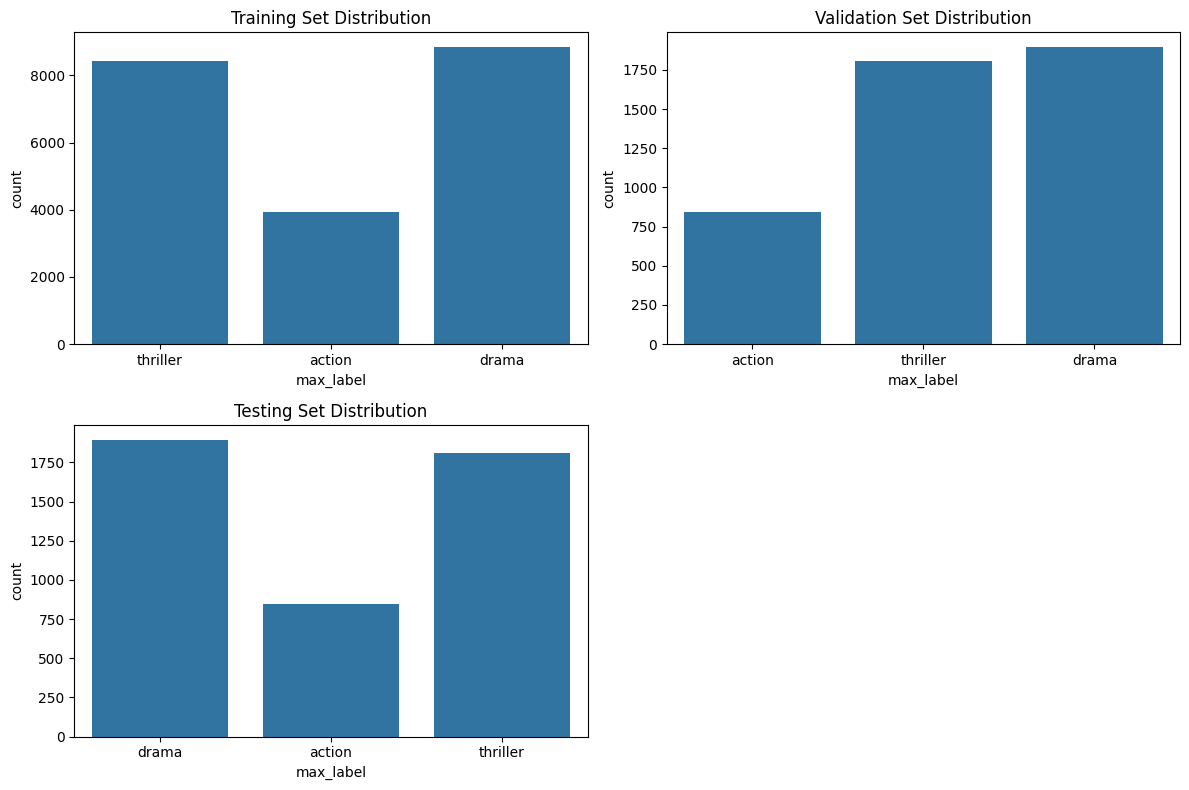

In [7]:
# Plotting the distribution of target labels in each dataset
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.countplot(x='max_label', data=training_set)
plt.title("Training Set Distribution")

plt.subplot(2, 2, 2)
sns.countplot(x='max_label', data=validation_set)
plt.title("Validation Set Distribution")

plt.subplot(2, 2, 3)
sns.countplot(x='max_label', data=test_set)
plt.title("Testing Set Distribution")

plt.tight_layout()
plt.show()

In [8]:
# Check overlap (should be empty)
overlap = set(training_set).intersection(set(test_set.index))
print("Overlap between train and test sets:", overlap)

Overlap between train and test sets: set()


In [9]:
training_set = training_set.drop('max_label', axis=1)
validation_set = validation_set.drop('max_label', axis=1)
test_set = test_set.drop('max_label', axis=1)

In [10]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21224 entries, 24155 to 19423
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Episode 1              21224 non-null  object 
 1   Time period Episode 1  21224 non-null  object 
 2   Genres Episode 1       21224 non-null  object 
 3   Episode 2              21224 non-null  object 
 4   Time period Episode 2  21224 non-null  object 
 5   Genres Episode 2       21224 non-null  object 
 6   Episode 3              21224 non-null  object 
 7   Time period Episode 3  21224 non-null  object 
 8   Genres Episode 3       21224 non-null  object 
 9   Episode 4              21224 non-null  object 
 10  Time period Episode 4  21224 non-null  object 
 11  Genres Episode 4       21224 non-null  object 
 12  Episode 5              21224 non-null  object 
 13  Time period Episode 5  21224 non-null  object 
 14  Genres Episode 5       21224 non-null  object 
 15  Epi

# Transforming data into numerical values

### Custom Transformers

In [11]:
from transformers import GenresTransformer, TimePeriodTransformer

In [12]:
# Custom transformer for Genre columns

# Columns to transform
genres_columns = [f'Genres Episode {i}' for i in range(1, 9)]

# Instantiate the transformer
genres_transformer = GenresTransformer(columns=genres_columns)

# Apply the transformer to your data
training_set = genres_transformer.fit_transform(training_set)
validation_set = genres_transformer.transform(validation_set)
test_set = genres_transformer.transform(test_set)

training_set.head()


,Episode 1,Time period Episode 1,Genres Episode 1 drama,Genres Episode 1 thriller,Genres Episode 1 action,Episode 2,Time period Episode 2,Genres Episode 2 drama,Genres Episode 2 thriller,Genres Episode 2 action,...,Genres Episode 7 thriller,Genres Episode 7 action,Episode 8,Time period Episode 8,Genres Episode 8 drama,Genres Episode 8 thriller,Genres Episode 8 action,drama label,thriller label,action label
24155,Green,7 Years Before the Heist,0.45,0.15,0.40,Orange,3 Weeks Before the Heist,0.67,0.14,0.19,...,0.48,0.52,Pink,6 Months After the Heist,0.55,0.20,0.25,0.2422,0.4744,0.2833
22902,Blue,5 Days Before the Heist,0.56,0.33,0.11,Green,7 Years Before the Heist,0.50,0.15,0.35,...,0.23,0.18,Violet,24 Years Before the Heist,0.52,0.24,0.24,0.3250,0.4290,0.2460
14002,Yellow,6 Weeks Before the Heist,0.13,0.39,0.48,White,The Heist,0.15,0.35,0.50,...,0.42,0.21,Green,7 Years Before the Heist,0.36,0.27,0.36,0.2993,0.2492,0.4515
17913,Yellow,6 Weeks Before the Heist,0.13,0.39,0.48,Orange,3 Weeks Before the Heist,0.67,0.14,0.19,...,0.19,0.29,White,The Heist,0.00,0.48,0.52,0.1836,0.4018,0.4145
23869,Green,7 Years Before the Heist,0.45,0.15,0.40,White,The Heist,0.15,0.35,0.50,...,0.23,0.18,Yellow,6 Weeks Before the Heist,0.13,0.39,0.48,0.3933,0.2784,0.3283


In [13]:
# Custom transformer for Time Period columns

# Columns to transform
time_period_columns = [f'Time period Episode {i}' for i in range(1, 9)]

# Instantiate the transformer
time_period_transformer = TimePeriodTransformer(columns=time_period_columns)

# Apply the transformer to your data
training_set = time_period_transformer.fit_transform(training_set)
validation_set = time_period_transformer.transform(validation_set)
test_set = time_period_transformer.transform(test_set)

training_set.head()


,Episode 1,Time period Episode 1,Genres Episode 1 drama,Genres Episode 1 thriller,Genres Episode 1 action,Episode 2,Time period Episode 2,Genres Episode 2 drama,Genres Episode 2 thriller,Genres Episode 2 action,...,Genres Episode 7 thriller,Genres Episode 7 action,Episode 8,Time period Episode 8,Genres Episode 8 drama,Genres Episode 8 thriller,Genres Episode 8 action,drama label,thriller label,action label
24155,Green,-2557,0.45,0.15,0.40,Orange,-21,0.67,0.14,0.19,...,0.48,0.52,Pink,181,0.55,0.20,0.25,0.2422,0.4744,0.2833
22902,Blue,-5,0.56,0.33,0.11,Green,-2557,0.50,0.15,0.35,...,0.23,0.18,Violet,-8766,0.52,0.24,0.24,0.3250,0.4290,0.2460
14002,Yellow,-42,0.13,0.39,0.48,White,0,0.15,0.35,0.50,...,0.42,0.21,Green,-2557,0.36,0.27,0.36,0.2993,0.2492,0.4515
17913,Yellow,-42,0.13,0.39,0.48,Orange,-21,0.67,0.14,0.19,...,0.19,0.29,White,0,0.00,0.48,0.52,0.1836,0.4018,0.4145
23869,Green,-2557,0.45,0.15,0.40,White,0,0.15,0.35,0.50,...,0.23,0.18,Yellow,-42,0.13,0.39,0.48,0.3933,0.2784,0.3283


In [14]:
# No missing values
validation_set.isnull().sum()

Episode 1                    0
Time period Episode 1        0
Genres Episode 1 drama       0
Genres Episode 1 thriller    0
Genres Episode 1 action      0
Episode 2                    0
Time period Episode 2        0
Genres Episode 2 drama       0
Genres Episode 2 thriller    0
Genres Episode 2 action      0
Episode 3                    0
Time period Episode 3        0
Genres Episode 3 drama       0
Genres Episode 3 thriller    0
Genres Episode 3 action      0
Episode 4                    0
Time period Episode 4        0
Genres Episode 4 drama       0
Genres Episode 4 thriller    0
Genres Episode 4 action      0
Episode 5                    0
Time period Episode 5        0
Genres Episode 5 drama       0
Genres Episode 5 thriller    0
Genres Episode 5 action      0
Episode 6                    0
Time period Episode 6        0
Genres Episode 6 drama       0
Genres Episode 6 thriller    0
Genres Episode 6 action      0
Episode 7                    0
Time period Episode 7        0
Genres E

# Visualizing Features

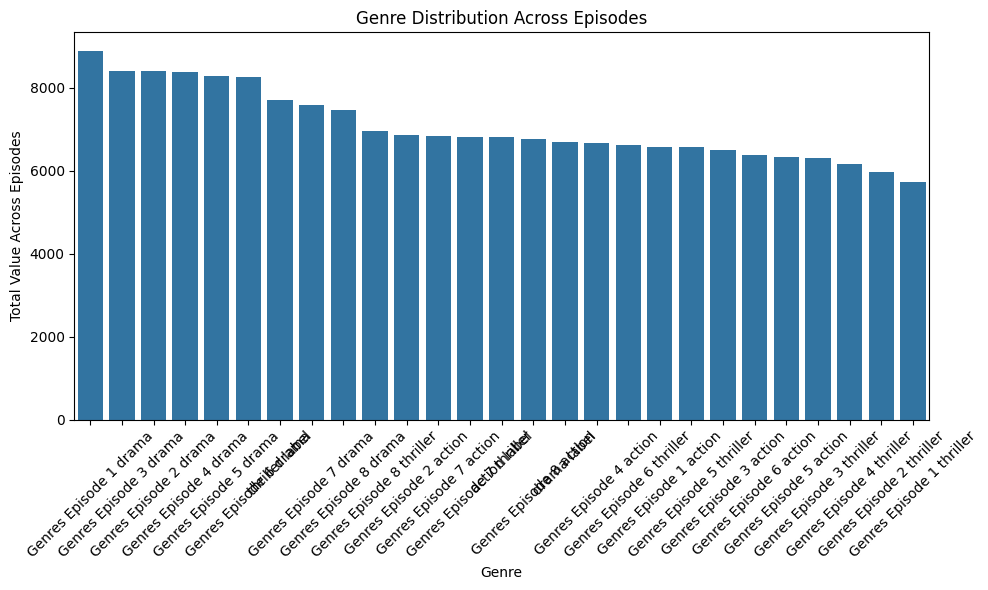

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


# List of all genre columns (you may adjust this to match your actual column names)
genre_columns = [col for col in training_set.columns if any(genre in col for genre in ['drama', 'action', 'thriller'])]

# Summing the values for each genre across episodes (sum across rows for each genre column)
genre_sums = training_set[genre_columns].sum()

# Sort the genre sums in descending order for better visualization
genre_sums_sorted = genre_sums.sort_values(ascending=False)

# Plot the genre distribution (bar plot)
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_sums_sorted.index, y=genre_sums_sorted.values)
plt.title('Genre Distribution Across Episodes')
plt.xlabel('Genre')
plt.ylabel('Total Value Across Episodes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


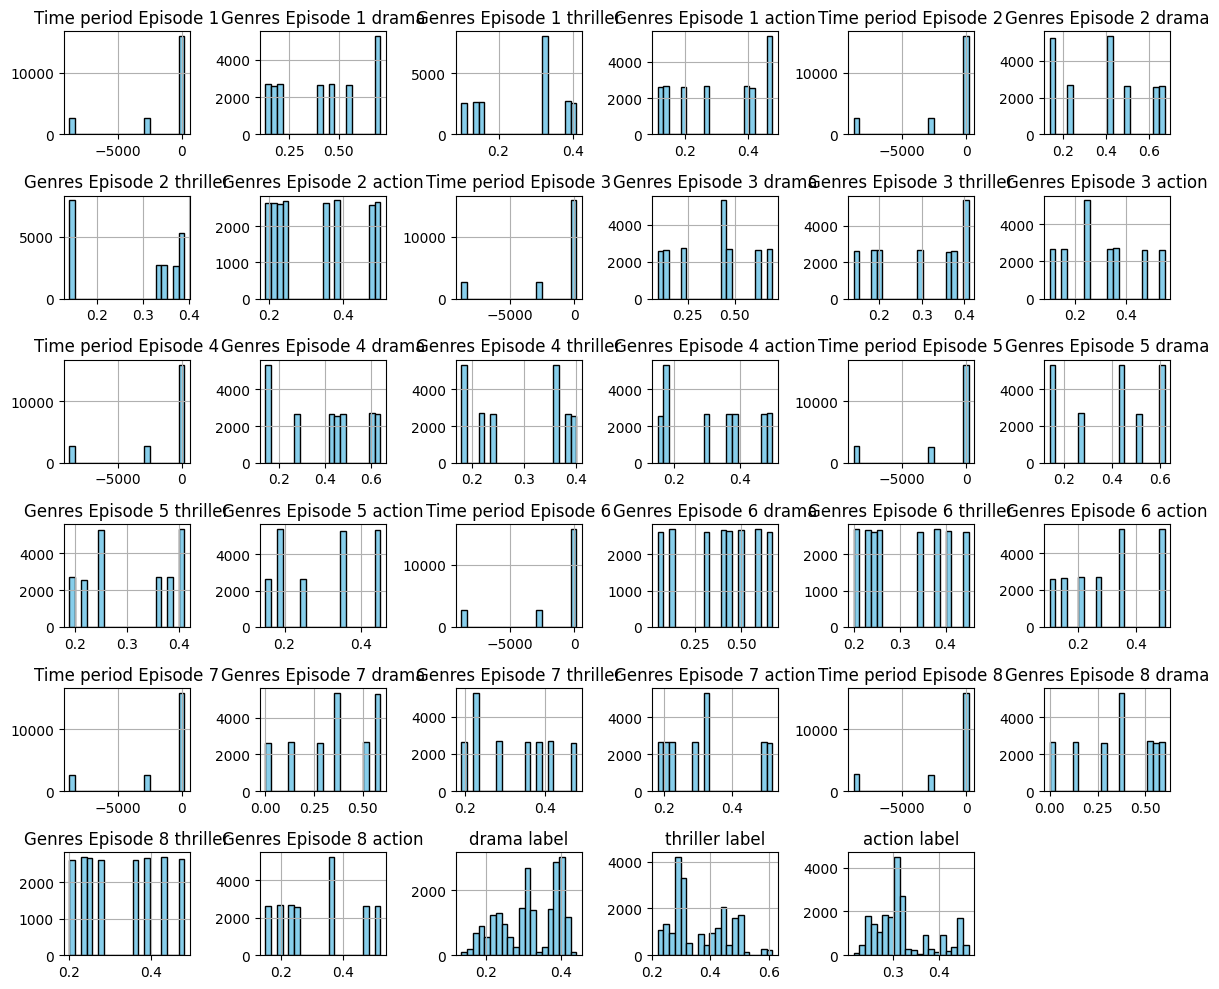

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for all numerical features
training_set.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()


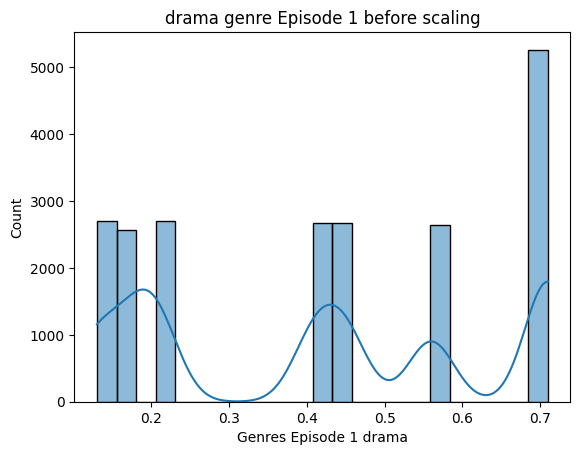

In [20]:
# Drama Genre feature before scaling:

sns.histplot(training_set['Genres Episode 1 drama'], kde=True)
plt.title('drama genre Episode 1 before scaling')
plt.show()

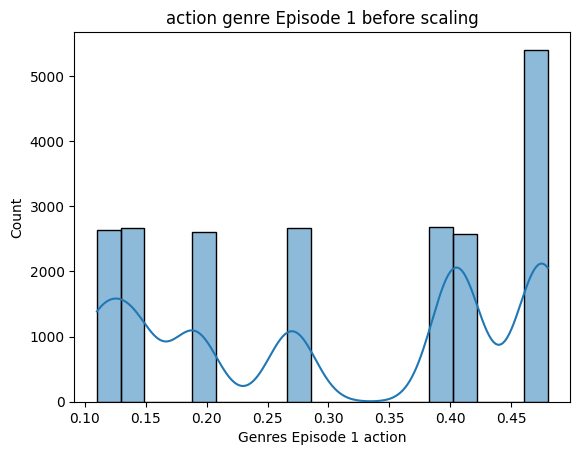

In [21]:
# Action Genre feature before scaling:

sns.histplot(training_set['Genres Episode 1 action'], kde=True)
plt.title('action genre Episode 1 before scaling')
plt.show()

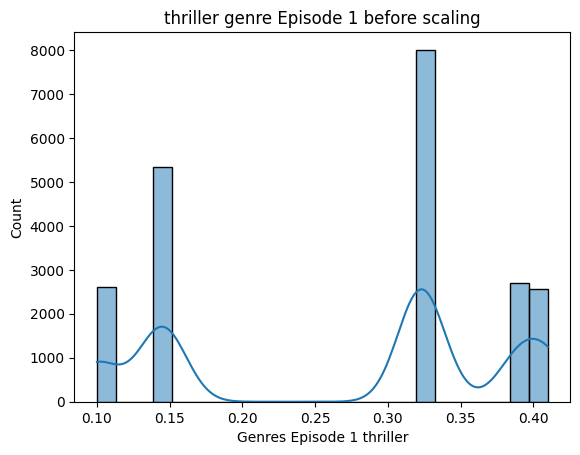

In [22]:
# thriller Genre feature before scaling:

sns.histplot(training_set['Genres Episode 1 thriller'], kde=True)
plt.title('thriller genre Episode 1 before scaling')
plt.show()

# Encoding Features

In [25]:
# Encoding episode names

ordinal_encoder = OrdinalEncoder()

episode_columns = [col for col in data.columns if col.startswith("Episode")]


# Fit and transform the 'Episode' feature
for col in episode_columns:  
    training_set[col] = ordinal_encoder.fit_transform(training_set[[col]])
    
    validation_set[col] = ordinal_encoder.transform(validation_set[[col]])
    test_set[col] = ordinal_encoder.transform(test_set[[col]])


# Scaling the features

In [26]:
# Scaling time period columns
robust_scaler = RobustScaler()

for i in range(1, 9):
    time_period_column = f'Time period Episode {i}'
    training_set[time_period_column] = robust_scaler.fit_transform(training_set[[time_period_column]])
    
    validation_set[time_period_column] = robust_scaler.transform(validation_set[[time_period_column]])
    test_set[time_period_column] = robust_scaler.transform(test_set[[time_period_column]])


# Define the final columns

In [27]:
# Define target columns for multi-output regression
label_columns = ['drama label', 'thriller label', 'action label']


X_train = training_set.drop(columns=label_columns)
y_train = training_set[label_columns]

X_validation = validation_set.drop(columns=label_columns)
y_validation = validation_set[label_columns]

X_test = test_set.drop(columns=label_columns)
y_test = test_set[label_columns]

Checks after preprocessing

In [28]:
X_train.dtypes

Episode 1                    float64
Time period Episode 1        float64
Genres Episode 1 drama       float64
Genres Episode 1 thriller    float64
Genres Episode 1 action      float64
Episode 2                    float64
Time period Episode 2        float64
Genres Episode 2 drama       float64
Genres Episode 2 thriller    float64
Genres Episode 2 action      float64
Episode 3                    float64
Time period Episode 3        float64
Genres Episode 3 drama       float64
Genres Episode 3 thriller    float64
Genres Episode 3 action      float64
Episode 4                    float64
Time period Episode 4        float64
Genres Episode 4 drama       float64
Genres Episode 4 thriller    float64
Genres Episode 4 action      float64
Episode 5                    float64
Time period Episode 5        float64
Genres Episode 5 drama       float64
Genres Episode 5 thriller    float64
Genres Episode 5 action      float64
Episode 6                    float64
Time period Episode 6        float64
G

In [29]:

print("Missing values:", X_train.isnull().sum().sum())
print("Infinite values:", np.isinf(X_train).sum())


Missing values: 0
Infinite values: Episode 1                    0
Time period Episode 1        0
Genres Episode 1 drama       0
Genres Episode 1 thriller    0
Genres Episode 1 action      0
Episode 2                    0
Time period Episode 2        0
Genres Episode 2 drama       0
Genres Episode 2 thriller    0
Genres Episode 2 action      0
Episode 3                    0
Time period Episode 3        0
Genres Episode 3 drama       0
Genres Episode 3 thriller    0
Genres Episode 3 action      0
Episode 4                    0
Time period Episode 4        0
Genres Episode 4 drama       0
Genres Episode 4 thriller    0
Genres Episode 4 action      0
Episode 5                    0
Time period Episode 5        0
Genres Episode 5 drama       0
Genres Episode 5 thriller    0
Genres Episode 5 action      0
Episode 6                    0
Time period Episode 6        0
Genres Episode 6 drama       0
Genres Episode 6 thriller    0
Genres Episode 6 action      0
Episode 7                    0
Time

In [30]:
print("Train set distribution:")
print(y_train.describe())                   

print("Test set distribution:")
print(y_test.describe())           

Train set distribution:
        drama label  thriller label  action label
count  21224.000000    21224.000000  21224.000000
mean       0.315847        0.363340      0.320811
std        0.077602        0.094784      0.061782
min        0.133100        0.219000      0.213600
25%        0.245800        0.287900      0.279200
50%        0.316000        0.314600      0.308700
75%        0.390000        0.445000      0.334200
max        0.441200        0.612700      0.465000
Test set distribution:
       drama label  thriller label  action label
count  4548.000000     4548.000000   4548.000000
mean      0.316254        0.363434      0.320309
std       0.077148        0.096068      0.062177
min       0.134600        0.220000      0.215700
25%       0.246900        0.287100      0.277800
50%       0.316600        0.313800      0.308700
75%       0.390000        0.445925      0.330400
max       0.433800        0.608500      0.463000


In [31]:
print("training set features: ")
print(X_train.columns)
print("training set labels: ")
print(y_train.columns)


training set features: 
Index(['Episode 1', 'Time period Episode 1', 'Genres Episode 1 drama',
       'Genres Episode 1 thriller', 'Genres Episode 1 action', 'Episode 2',
       'Time period Episode 2', 'Genres Episode 2 drama',
       'Genres Episode 2 thriller', 'Genres Episode 2 action', 'Episode 3',
       'Time period Episode 3', 'Genres Episode 3 drama',
       'Genres Episode 3 thriller', 'Genres Episode 3 action', 'Episode 4',
       'Time period Episode 4', 'Genres Episode 4 drama',
       'Genres Episode 4 thriller', 'Genres Episode 4 action', 'Episode 5',
       'Time period Episode 5', 'Genres Episode 5 drama',
       'Genres Episode 5 thriller', 'Genres Episode 5 action', 'Episode 6',
       'Time period Episode 6', 'Genres Episode 6 drama',
       'Genres Episode 6 thriller', 'Genres Episode 6 action', 'Episode 7',
       'Time period Episode 7', 'Genres Episode 7 drama',
       'Genres Episode 7 thriller', 'Genres Episode 7 action', 'Episode 8',
       'Time period Episo

# Model Selection

Linear Regression:
  Mean Squared Error on Validation Set: 0.0019
  R2 on Validation Set: 0.6733
----------------------------------------


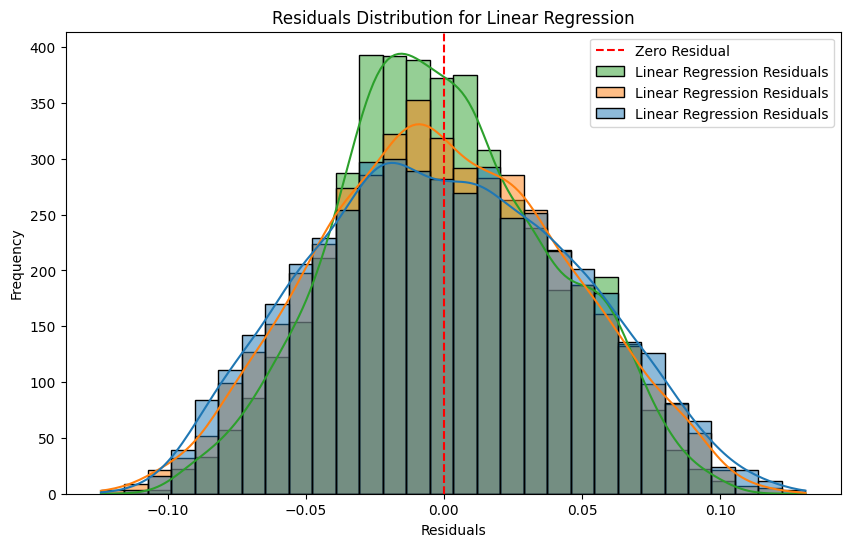

Decision Tree:
  Mean Squared Error on Validation Set: 0.0000
  R2 on Validation Set: 0.9975
----------------------------------------


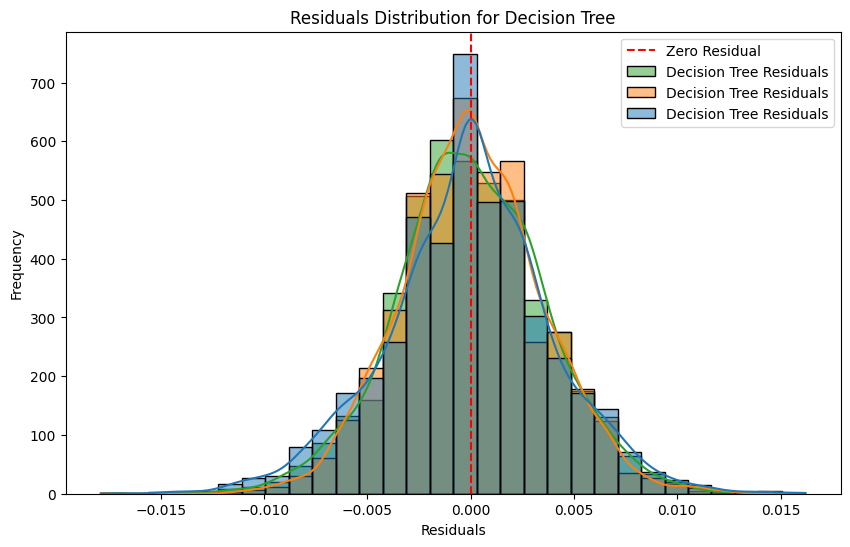

K-Nearest Neighbors:
  Mean Squared Error on Validation Set: 0.0029
  R2 on Validation Set: 0.5424
----------------------------------------


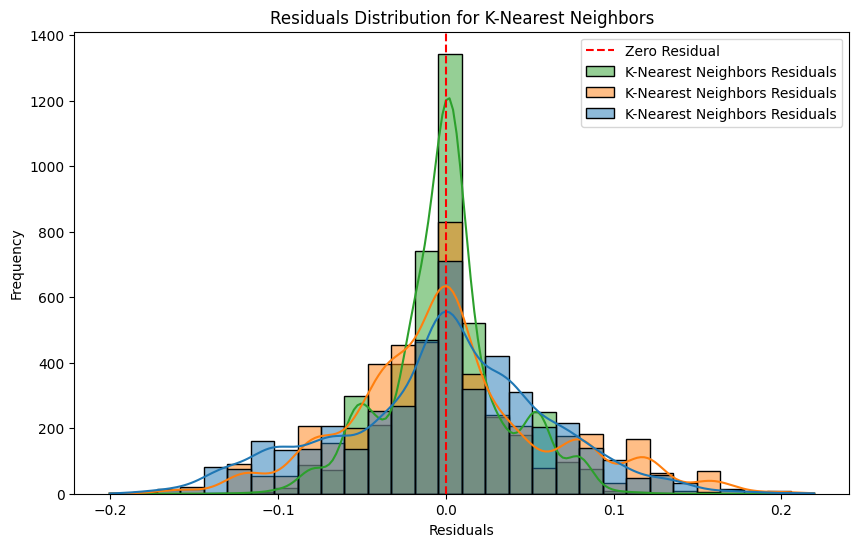

Random Forest:
  Mean Squared Error on Validation Set: 0.0000
  R2 on Validation Set: 0.9990
----------------------------------------


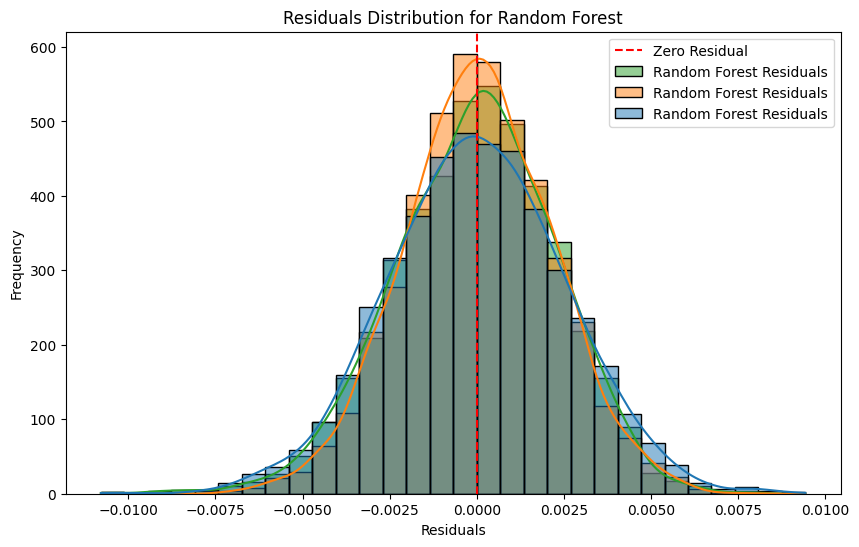


Summary of Results:
Random Forest: MSE=0.0000, R2=0.9990
Decision Tree: MSE=0.0000, R2=0.9975
Linear Regression: MSE=0.0019, R2=0.6733
K-Nearest Neighbors: MSE=0.0029, R2=0.5424


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

regressors = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
}

results = []

for name, model in regressors.items():
    model.fit(X_train, y_train)
    
    val_preds = model.predict(X_validation)
    
    val_mse = mean_squared_error(y_validation, val_preds)
    val_r2 = r2_score(y_validation, val_preds, multioutput='uniform_average')
    
    print(f"{name}:")
    print(f"  Mean Squared Error on Validation Set: {val_mse:.4f}")
    print(f"  R2 on Validation Set: {val_r2:.4f}")
    print("-" * 40)
    
    results.append((name, val_mse, val_r2))
    
    # Plot the error distribution (residuals)
    residuals = y_validation - val_preds
    
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, bins=30, color='blue', label=f'{name} Residuals')
    plt.axvline(x=0, color='red', linestyle='--', label='Zero Residual')
    plt.title(f'Residuals Distribution for {name}')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

print("\nSummary of Results:")
for name, mse, r2 in sorted(results, key=lambda x: x[1]): 
    print(f"{name}: MSE={mse:.4f}, R2={r2:.4f}")


## Random Forest as the selected model

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the train set
rf_train_preds = rf_model.predict(X_train)
train_mse = mean_squared_error(y_train, rf_train_preds)
train_r2 = r2_score(y_train, rf_train_preds, multioutput='uniform_average')

print(f"Mean Squared Error on Training Set: {train_mse:.4f}")
print(f"R2 on Training Set: {train_r2:.4f}")

Mean Squared Error on Training Set: 0.0000
R2 on Training Set: 0.9999


In [36]:
# Predict on the validation set
rf_val_preds = rf_model.predict(X_validation)

# Evaluate the model
val_mse = mean_squared_error(y_validation, rf_val_preds)
val_r2 = r2_score(y_validation, rf_val_preds, multioutput='uniform_average') 
print(f"Mean Squared Error on Validation Set: {val_mse:.4f}")
print(f"R2 on Validation Set: {val_r2:.4f}")

Mean Squared Error on Validation Set: 0.0000
R2 on Validation Set: 0.9990


In [37]:
# Predict on the test set
rf_test_preds = rf_model.predict(X_test)

# Evaluate the model
test_mse = mean_squared_error(y_test, rf_val_preds)
test_r2 = r2_score(y_test, rf_test_preds, multioutput='uniform_average') 
print(f"Mean Squared Error on Test Set: {test_mse:.4f}")
print(f"R2 on Test Set: {test_r2:.4f}")

Mean Squared Error on Test Set: 0.0128
R2 on Test Set: 0.9990


In [43]:
# Check for overfitting
if train_r2 > 0.9 and test_r2 < 0.8:
    print("\nWarning: Overfitting detected!")
    print("The model performs significantly better on the training set than on the testing set.")
else:
    print("\nNo significant overfitting detected.")


No significant overfitting detected.


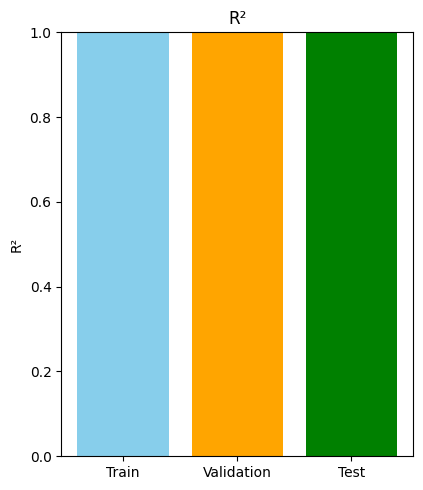

In [41]:
# Plotting the MSE for training, validation, and test sets with a logarithmic scale
plt.figure(figsize=(8, 5))

# Plot R²
plt.subplot(1, 2, 2)
plt.bar(['Train', 'Validation', 'Test'], [train_r2, val_r2, test_r2], color=['skyblue', 'orange', 'green'])
plt.title('R²')
plt.ylabel('R²')
plt.ylim(0, 1)  # R² is between 0 and 1

# Display the plots
plt.tight_layout()
plt.show()


Cross-Validation RMSE Scores: [0.00253858 0.00256315 0.0025062  0.00252731 0.00252678]
Mean RMSE: 0.002532403307275101
Standard Deviation of RMSE: 1.8588690388017648e-05


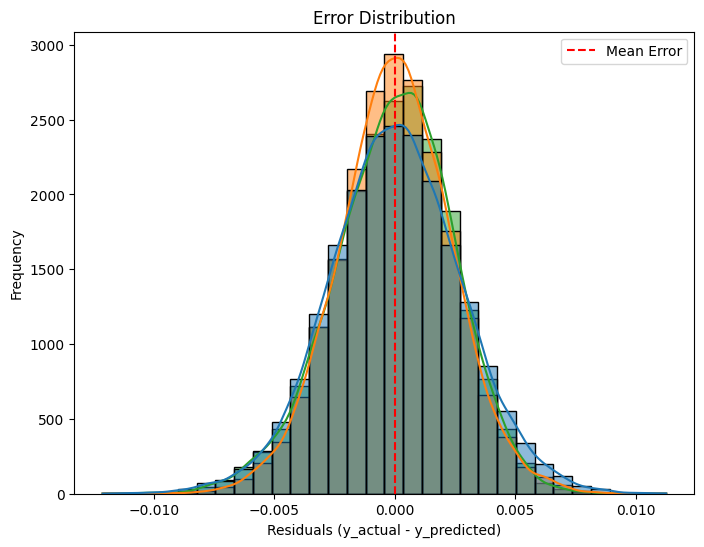

In [42]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Perform cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')

# Convert negative MSE to positive for interpretability
cv_rmse = np.sqrt(-cv_scores)

print("Cross-Validation RMSE Scores:", cv_rmse)
print("Mean RMSE:", cv_rmse.mean())
print("Standard Deviation of RMSE:", cv_rmse.std())

# Predictions for error distribution
y_pred_cv = cross_val_predict(model, X_train, y_train, cv=cv)
residuals = y_train - y_pred_cv

# Plotting the error distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.title("Error Distribution")
plt.xlabel("Residuals (y_actual - y_predicted)")
plt.ylabel("Frequency")
plt.axvline(0, color='red', linestyle='--', label="Mean Error")
plt.legend()
plt.show()


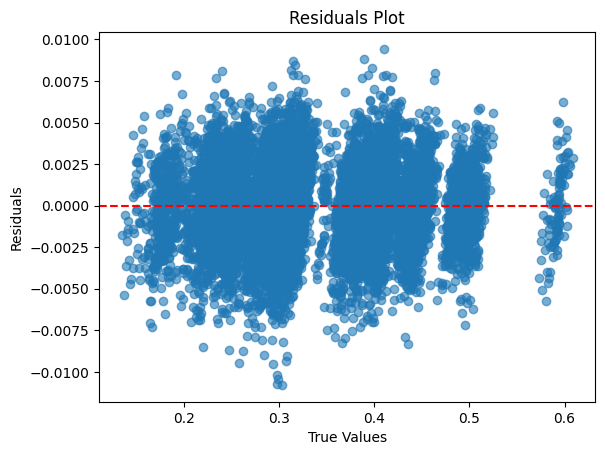

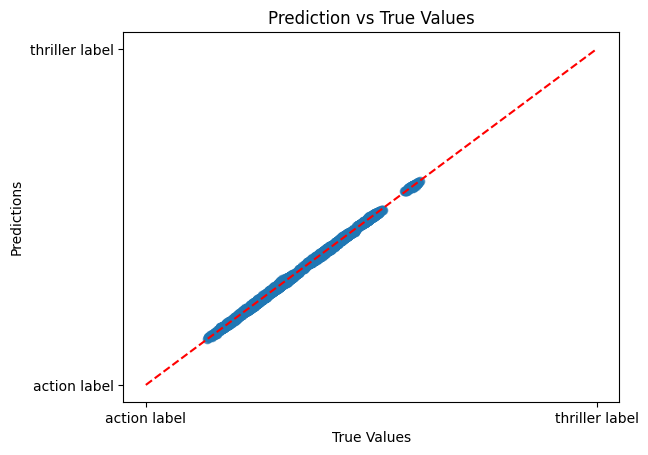

In [44]:
# Residuals plot
residuals = y_validation - rf_val_preds
plt.scatter(y_validation, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals Plot")
plt.xlabel("True Values")
plt.ylabel("Residuals")
plt.show()

# Prediction vs True Values
plt.scatter(y_validation, rf_val_preds, alpha=0.6)
plt.plot([min(y_validation), max(y_validation)], [min(y_validation), max(y_validation)], 'r--')  # Line of perfect prediction
plt.title("Prediction vs True Values")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

In [45]:
import numpy as np

sample_index = np.random.randint(0, len(X_validation)) 
sample_features = X_validation.iloc[sample_index].values.reshape(1, -1) 
sample_actual = y_validation.iloc[sample_index]  


sample_prediction = rf_model.predict(sample_features)


print("Actual Value:", sample_actual)
print("Predicted Value:", sample_prediction)


Actual Value: drama label       0.294
thriller label    0.459
action label      0.247
Name: 5986, dtype: float64
Predicted Value: [[0.290373 0.456455 0.253173]]


c:\Users\ysh6\anaconda3\envs\Trial\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
